In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h3>[Problem 1] Confirmation of competition contents</h3>

<h4>What to learn and what to predict?</h4>
Clients' repayment abilities, probabilities of having payment difficulties in the future

<h4>What kind of file to create and submit to Kaggle?</h4>
.csv file

<h4>What kind of index value will be used to evaluate the submissions?</h4>

- SK_ID_CURR
- TARGET

<h3>[Problem 2] Learning and verification</h3>

<h4>Overview</h4>

In [4]:
col_descr = pd.read_csv('./HomeCredit_columns_description.csv')
display(col_descr[col_descr['Table'] == 'application_{train|test}.csv'])

,no,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [5]:
application_data_root = pd.read_csv('./application_train.csv')

In [6]:
display(application_data_root.shape)
application_data_root.head()

(307511, 122)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

process missing data: delete all columns that has at least 1 missing data to avoid statistics error

In [7]:
missing_value_count = application_data_root.isnull().sum()
missing_value_percentage = (missing_value_count / application_data_root.shape[0]) * 100

missing_value_data = pd.DataFrame({
                            'missing_count': missing_value_count,
                            'missing_percentage': missing_value_percentage
                        })

missing_value_data

,missing_count,missing_percentage
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.003902


<h4>Preprocessing</h4>

In [8]:
application_data1 = application_data_root.copy()

process missing data: 

In [9]:
for feature in missing_value_data.index:
    if (missing_value_data.loc[feature, 'missing_count'] > 0):
        application_data1.drop(columns=feature, inplace=True)

print(application_data1.shape)
application_data1.head()

(307511, 55)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
application_data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DO

<h4>Training</h4>
Let's make a baseline model using Logistic regression respect to 2 features AMT_INCOME_TOTAL and 	AMT_CREDIT

In [11]:
x1 = np.array(application_data1['AMT_INCOME_TOTAL']).reshape(application_data1['AMT_INCOME_TOTAL'].size, 1)
x2 = np.array(application_data1['AMT_CREDIT']).reshape(application_data1['AMT_CREDIT'].size, 1)

X = np.concatenate((x1, x2), axis=1)
y = np.array(application_data1['TARGET'])

display(X[0:5, :])
display(y[0:5])

array([[ 202500. ,  406597.5],
       [ 270000. , 1293502.5],
       [  67500. ,  135000. ],
       [ 135000. ,  312682.5],
       [ 121500. ,  513000. ]])

array([1, 0, 0, 0, 0])

In [12]:
X_train, X_true, y_train, y_true = train_test_split(X, y, test_size=0.25, random_state=50)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_true_std = scaler.transform(X_true)

print(scaler.mean_)
display(X_train_std[0:5])
display(X_true_std[0:5])

[168882.15162798 599022.26471277]


array([[ 0.20963923,  0.18865319],
       [-0.21062659,  2.448745  ],
       [-0.46278608, -1.04043487],
       [-0.12657342, -0.37764355],
       [ 0.12558607, -0.19303452]])

array([[ 0.32731366, -0.3700232 ],
       [-0.12657342, -0.13540147],
       [-0.12657342, -0.24534898],
       [-0.27786912,  0.58743639],
       [ 0.20963923,  0.54727873]])

In [14]:
lr = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_std, y_train)
y_predict_proba = lr.predict_proba(X_true_std)

display(y_predict_proba)

array([[0.9159727 , 0.0840273 ],
       [0.91824373, 0.08175627],
       [0.91725139, 0.08274861],
       ...,
       [0.92652259, 0.07347741],
       [0.93546092, 0.06453908],
       [0.90981281, 0.09018719]])

<h4>Verification</h4>

In [15]:
print("Score = {}".format(metrics.roc_auc_score(y_true, y_predict_proba[:, 1], multi_class='ovr')))

Score = 0.5201519936439306


<h3>[Problem 3] Estimation on test data</h3>

In [16]:
application_test_root = pd.read_csv('./application_test.csv')

In [17]:
application_test_root.shape

(48744, 121)

In [18]:
application_test_root.isnull().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [19]:
x1_test = np.array(application_test_root['AMT_INCOME_TOTAL']).reshape(application_test_root['AMT_INCOME_TOTAL'].size, 1)
x2_test = np.array(application_test_root['AMT_CREDIT']).reshape(application_test_root['AMT_CREDIT'].size, 1)

X_test = np.concatenate((x1_test, x2_test), axis=1)

In [20]:
X_test_std = scaler.transform(X_test)

In [21]:
y_test_predict = lr.predict_proba(X_test_std)[:, 1]

In [22]:
result_table = pd.DataFrame({
            'SK_ID_CURR': application_test_root['SK_ID_CURR'],
            'TARGET': y_test_predict
})

display(result_table.shape)
display(result_table.head())

(48744, 2)

,SK_ID_CURR,TARGET
0,100001,0.081216
1,100005,0.089175
2,100013,0.079222
3,100028,0.061690
4,100038,0.080019


In [23]:
result_table.to_csv('./submission.csv',index=False)

<h3>[Problem 4] Feature engineering</h3>

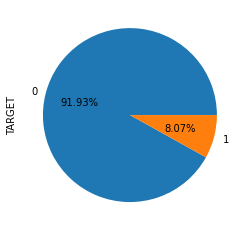

In [24]:
application_data1['TARGET'].value_counts().plot.pie(autopct=lambda p: "{:.2f}%".format(p))

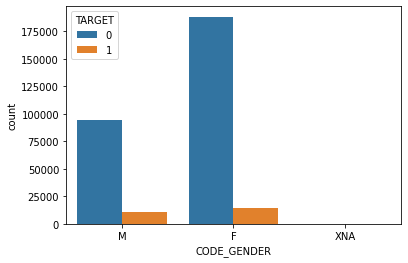

In [25]:
sns.countplot(x='CODE_GENDER', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'CODE_GENDER']])

It can be seen that, most of clients have payment difficulties and the distribution of payment difficulties cases over other cases of women is nearly doubled men. Therefore, women tend to have more payment difficulties than men. So let's take this feature to train the model

In [26]:
application_data2 = application_data1.copy()

In [27]:
application_data2['CODE_GENDER'].replace('M', 1, inplace = True)
application_data2['CODE_GENDER'].replace('F', -1, inplace = True)
application_data2['CODE_GENDER'].replace('XNA', 0, inplace = True)
display(application_data2['CODE_GENDER'].head())

0    1
1   -1
2    1
3   -1
4    1
Name: CODE_GENDER, dtype: int64

Replace string value to int to be able to do statistics

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Unknown')]

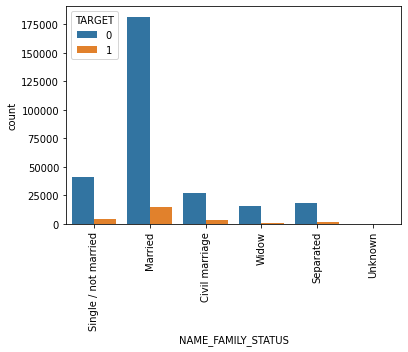

In [28]:
g = sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=application_data2.loc[:, ['TARGET', 'NAME_FAMILY_STATUS']])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

The Married clients has the highest rate of payment difficulties. So let's try this feature

In [29]:
application_data2['NAME_FAMILY_STATUS'].replace('Single / not married', -2, inplace = True)
application_data2['NAME_FAMILY_STATUS'].replace('Married', -1, inplace = True)
application_data2['NAME_FAMILY_STATUS'].replace('Civil marriage', 0, inplace = True)
application_data2['NAME_FAMILY_STATUS'].replace('Widow', 1, inplace = True)
application_data2['NAME_FAMILY_STATUS'].replace('Separated', 2, inplace = True)
application_data2['NAME_FAMILY_STATUS'].replace('Unknown', 3, inplace = True)
display(application_data2['NAME_FAMILY_STATUS'].head())

0   -2
1   -1
2   -2
3    0
4   -2
Name: NAME_FAMILY_STATUS, dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '19')]

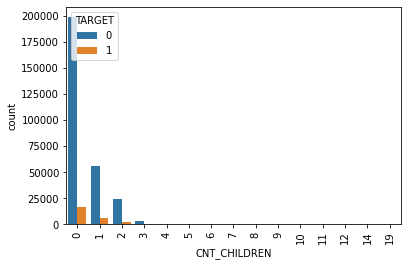

In [30]:
g = sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'CNT_CHILDREN']])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Also the count children statistics has something special

In [31]:
for i in range(0, 20):
    application_data2['CNT_CHILDREN'].replace(int(i), -9 + i, inplace = True)

display(application_data2['CNT_CHILDREN'].head())

0   -9
1   -9
2   -9
3   -9
4   -9
Name: CNT_CHILDREN, dtype: int64

Using there features CODE_GENDER, NAME_FAMILY_STATUS, CNT_CHILDREN to build the training model

In [32]:
x1 = np.array(application_data2['CODE_GENDER']).reshape(application_data2['CODE_GENDER'].shape[0], 1)
x2 = np.array(application_data2['NAME_FAMILY_STATUS']).reshape(application_data2['NAME_FAMILY_STATUS'].shape[0], 1)
x3 = np.array(application_data2['CNT_CHILDREN']).reshape(application_data2['CNT_CHILDREN'].shape[0], 1)

X = np.concatenate((x1, x2, x3), axis=1)
y = np.array(application_data2['TARGET'])

display(X[:5, :])
display(y[:5])

array([[ 1, -2, -9],
       [-1, -1, -9],
       [ 1, -2, -9],
       [-1,  0, -9],
       [ 1, -2, -9]])

array([1, 0, 0, 0, 0])

In [33]:
X_train, X_true, y_train, y_true = train_test_split(X, y, test_size=0.25, random_state=50)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_true_std = scaler.transform(X_true)

print(scaler.mean_)
display(X_train_std[0:5])
display(X_true_std[0:5])

[-0.3175608  -0.75232512 -8.58217601]


array([[ 1.38949341, -1.26393729,  2.18615323],
       [ 1.38949341, -0.25090311, -0.57732342],
       [-0.71969716, -0.25090311,  2.18615323],
       [-0.71969716, -0.25090311, -0.57732342],
       [ 1.38949341,  0.76213106, -0.57732342]])

array([[ 1.38949341, -0.25090311,  0.8044149 ],
       [ 1.38949341, -0.25090311, -0.57732342],
       [-0.71969716, -0.25090311, -0.57732342],
       [-0.71969716, -0.25090311, -0.57732342],
       [ 1.38949341, -0.25090311, -0.57732342]])

<h4>Logistic Regression</h4>

In [34]:
lr = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_std, y_train)
y_predict_proba = lr.predict_proba(X_true_std)

display(y_predict_proba)

print("\nScore = {}".format(metrics.roc_auc_score(y_true, y_predict_proba[:, 1], multi_class='ovr')))

array([[0.89426942, 0.10573058],
       [0.90163849, 0.09836151],
       [0.93173705, 0.06826295],
       ...,
       [0.93173705, 0.06826295],
       [0.89358921, 0.10641079],
       [0.93173705, 0.06826295]])


Score = 0.5615969843022143


<h4></h4>

<h4>Decision Tree</h4>

In [35]:
dt = DecisionTreeClassifier(random_state=3).fit(X_train_std, y_train)
y_predict_proba = dt.predict_proba(X_true_std)

display(y_predict_proba)

print("\nScore = {}".format(metrics.roc_auc_score(y_true, y_predict_proba[:, 1], multi_class='ovr')))

array([[0.90428592, 0.09571408],
       [0.91394319, 0.08605681],
       [0.93785522, 0.06214478],
       ...,
       [0.93785522, 0.06214478],
       [0.84659091, 0.15340909],
       [0.93785522, 0.06214478]])


Score = 0.5742377017618716


<h4>Random Forest</h4>

In [36]:
rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_std, y_train)
y_predict_proba = rf.predict_proba(X_true_std)

display(y_predict_proba)

print("\nScore = {}".format(metrics.roc_auc_score(y_true, y_predict_proba[:, 1], multi_class='ovr')))

array([[0.90776277, 0.09223723],
       [0.91212327, 0.08787673],
       [0.92959756, 0.07040244],
       ...,
       [0.92959756, 0.07040244],
       [0.89249217, 0.10750783],
       [0.92959756, 0.07040244]])


Score = 0.5679688135315685


<h4>10-neighbors</h4>

In [37]:
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train_std, y_train)
y_predict_proba = neigh.predict_proba(X_true_std)

display(y_predict_proba)

print("\nScore = {}".format(metrics.roc_auc_score(y_true, y_predict_proba[:, 1], multi_class='ovr')))

array([[0.9, 0.1],
       [0.7, 0.3],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ]])


Score = 0.5432802785210148


<h4>1000-neighbors</h4>

In [40]:
neigh = KNeighborsClassifier(n_neighbors=1000).fit(X_train_std, y_train)
y_predict_proba = neigh.predict_proba(X_true_std)

display(y_predict_proba)

print("\nScore = {}".format(metrics.roc_auc_score(y_true, y_predict_proba[:, 1], multi_class='ovr')))

array([[0.907, 0.093],
       [0.908, 0.092],
       [0.943, 0.057],
       ...,
       [0.943, 0.057],
       [0.854, 0.146],
       [0.943, 0.057]])


Score = 0.5716865145714105


<h4>Try 1000-neigbors model for test data</h4>

In [39]:
application_test2 = application_test_root.copy()

application_test2['CODE_GENDER'].replace('M', 1, inplace = True)
application_test2['CODE_GENDER'].replace('F', -1, inplace = True)
application_test2['CODE_GENDER'].replace('XNA', 0, inplace = True)

application_test2['NAME_FAMILY_STATUS'].replace('Single / not married', -2, inplace = True)
application_test2['NAME_FAMILY_STATUS'].replace('Married', -1, inplace = True)
application_test2['NAME_FAMILY_STATUS'].replace('Civil marriage', 0, inplace = True)
application_test2['NAME_FAMILY_STATUS'].replace('Widow', 1, inplace = True)
application_test2['NAME_FAMILY_STATUS'].replace('Separated', 2, inplace = True)
application_test2['NAME_FAMILY_STATUS'].replace('Unknown', 3, inplace = True)

for i in range(0, 20):
    application_test2['CNT_CHILDREN'].replace(int(i), -9 + i, inplace = True)

x1_test = np.array(application_test2['CODE_GENDER']).reshape(application_test2['CODE_GENDER'].size, 1)
x2_test = np.array(application_test2['NAME_FAMILY_STATUS']).reshape(application_test2['NAME_FAMILY_STATUS'].size, 1)
x3_test = np.array(application_test2['CNT_CHILDREN']).reshape(application_test2['CNT_CHILDREN'].size, 1)


X = np.concatenate((x1, x2, x3), axis=1)
y = np.array(application_data2['TARGET'])

X_test = np.concatenate((x1_test, x2_test, x3_test), axis=1)
X_test_std = scaler.transform(X_test)

neigh = KNeighborsClassifier(n_neighbors=1000).fit(X_train_std, y_train)
y_test_predict = neigh.predict_proba(X_test_std)[:, 1]

result_table = pd.DataFrame({
            'SK_ID_CURR': application_test_root['SK_ID_CURR'],
            'TARGET': y_test_predict
})

display(result_table.shape)
display(result_table.head())

result_table.to_csv('./submission2.csv',index=False)

(48744, 2)

,SK_ID_CURR,TARGET
0,100001,0.057
1,100005,0.092
2,100013,0.092
3,100028,0.095
4,100038,0.093


In overall, in the 5 models that I have build above the scores is better than the one in Problem 3. 1000-neigbors and Decision Tree model reach the highest score around ~0.57